<h1>Linear Regression</h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import tensorflow as tf
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = (10,6)


In [7]:
X = np.arange(0.0,5.0,0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

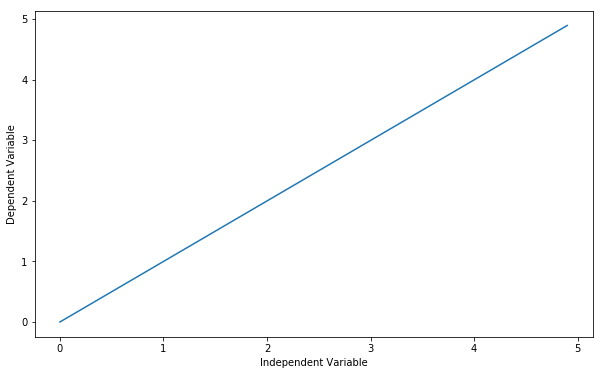

In [15]:
#slope and intercept
a =1
b =0
y = a*X + b
plt.plot(X,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [16]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS,CO2,SMOG
0,2018,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,6,3
1,2018,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4,3
2,2018,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,4,3
3,2018,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2018,ACURA,NSX,TWO-SEATER,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,3


<h4>Predict co2 Emission of cars based on their engine size.</h4>

In [27]:
train_x = np.asanyarray(df[['ENGINE SIZE']])
train_y = np.asanyarray(df[['CO2 EMISSIONS']])
train_x


array([[2.4],
       [3.5],
       [3.5],
       ...,
       [2. ],
       [2. ],
       [2. ]])

In [29]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b
y

<tf.Tensor 'add_1:0' shape=(1083, 1) dtype=float32>

In [31]:
loss = tf.reduce_mean(tf.square(y - train_y))
loss

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [32]:
optimizer = tf.train.GradientDescentOptimizer(0.05)


<h3>Training model</h3>

In [33]:
train = optimizer.minimize(loss)

In [37]:
init = tf.global_variables_initializer()
sess = tf.Session()
result = sess.run(init)


None


In [46]:
loss_values = []
train_data  = []
for step in range (100):
    _,loss_val, a_val, b_val = sess.run([train,loss,a,b])
    loss_values.append(loss_val)
    if step % 5 ==0:
        print(step,loss_val,a_val,b_val)
        train_data.append([a_val,b_val])
      

0 892.7789 35.710964 138.89761
5 892.7789 35.710964 138.89761
10 892.7789 35.710964 138.89761
15 892.7789 35.710964 138.89761
20 892.7789 35.710964 138.89761
25 892.7789 35.710964 138.89761
30 892.7789 35.710964 138.89761
35 892.7789 35.710964 138.89761
40 892.7789 35.710964 138.89761
45 892.7789 35.710964 138.89761
50 892.7789 35.710964 138.89761
55 892.7789 35.710964 138.89761
60 892.7789 35.710964 138.89761
65 892.7789 35.710964 138.89761
70 892.7789 35.710964 138.89761
75 892.7789 35.710964 138.89761
80 892.7789 35.710964 138.89761
85 892.7789 35.710964 138.89761
90 892.7789 35.710964 138.89761
95 892.7789 35.710964 138.89761


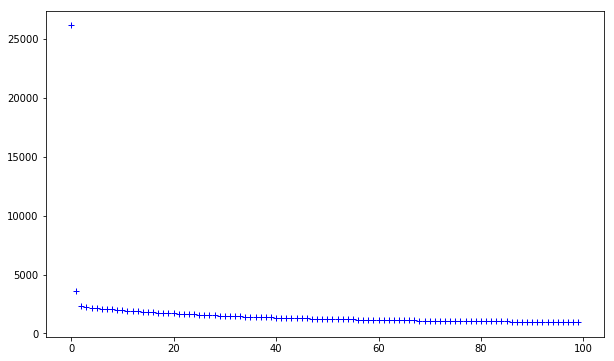

In [43]:
plt.plot(loss_values,'b+')

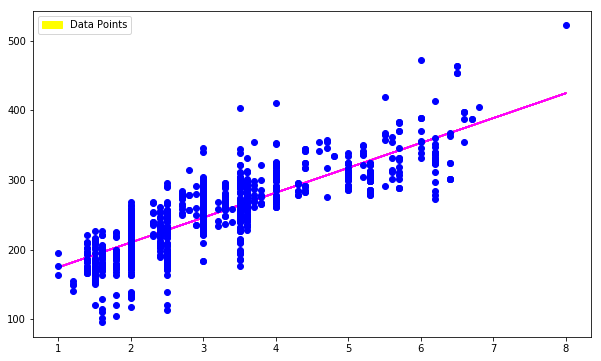

In [49]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'bo')


green_line = mpatches.Patch(color='yellow', label='Data Points')

plt.legend(handles=[green_line])

plt.show()